# Τεχνικές Εξόρυξης Δεδομένων Εαρινό εξάμηνο 2022-2023
## 2η Άσκηση
### Αλέξανδρος Αλατζάς 1115201900005

###Εισαγωγή βιβλιοθηκών και διάβασμα του αρχείου csv

In [1]:
# Mount our google drive in google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import textwrap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings

Εισαγωγή αρχείου σε dataframe, η εκκαθάριση Nan τιμών θα γίνει μόνο σε στήλες που αφορούν τα ερωτήματα.

In [37]:
# The dataframe is named train_test
location = r'/content/gdrive/MyDrive/DataMining/Project2/books_1.Best_Books_Ever.csv'
train_test = pd.read_csv(location)

### **Ζητούμενο 1**: Προεπεξεργασία

In [38]:
# Drop Nan values from columns used in this part
train_test.dropna(subset=['ratingsByStars', 'genres', 'publishDate'], inplace=True)

# Make a seperate column for each rating
ratings = train_test['ratingsByStars'].str.strip('[]').str.split(',', expand=True)

# For each rating, give the corresponding value and drop NaN rows
train_test['ratingStar5'] = pd.to_numeric(ratings[0].str.replace("'", ""))
train_test.dropna(subset=['ratingStar5'], inplace=True)
train_test['ratingStar5'] = train_test['ratingStar5'].astype(int)

train_test['ratingStar4'] = pd.to_numeric(ratings[1].str.replace("'", ""))
train_test.dropna(subset=['ratingStar4'], inplace=True)
train_test['ratingStar4'] = train_test['ratingStar4'].astype(int)

train_test['ratingStar3'] = pd.to_numeric(ratings[2].str.replace("'", ""))
train_test.dropna(subset=['ratingStar3'], inplace=True)
train_test['ratingStar3'] = train_test['ratingStar3'].astype(int)

train_test['ratingStar2'] = pd.to_numeric(ratings[3].str.replace("'", ""))
train_test.dropna(subset=['ratingStar2'], inplace=True)
train_test['ratingStar2'] = train_test['ratingStar2'].astype(int)

train_test['ratingStar1'] = pd.to_numeric(ratings[4].str.replace("'", ""))
train_test.dropna(subset=['ratingStar1'], inplace=True)
train_test['ratingStar1'] = train_test['ratingStar1'].astype(int)

# Drop rows without genre information
train_test = train_test.drop(train_test[train_test['genres'] == '[]'].index)

# Make a new column out of the first genre for each book
genres = train_test['genres'].str.strip('[]').str.split(',', expand=True)
train_test['genreSingle'] = genres[0]

# Make a new column containing the publication years
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
    train_test['publishYear'] = pd.to_datetime(train_test['publishDate'], errors='coerce').dt.year

# Some rows contain irrelevant date data and are transformed to NaN values
train_test.dropna(subset=['publishYear'], inplace=True)
train_test['publishYear'] = train_test['publishYear'].astype(int)


print(train_test[['genres', 'genreSingle']])
print(train_test[['publishDate', 'publishYear']])
print(train_test[['ratingsByStars', 'ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']])

                                                  genres    genreSingle
0      ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  'Young Adult'
1      ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...      'Fantasy'
2      ['Classics', 'Fiction', 'Historical Fiction', ...     'Classics'
3      ['Classics', 'Fiction', 'Romance', 'Historical...     'Classics'
4      ['Young Adult', 'Fantasy', 'Romance', 'Vampire...  'Young Adult'
...                                                  ...            ...
52473  ['Vampires', 'Paranormal', 'Young Adult', 'Rom...     'Vampires'
52474                         ['Mystery', 'Young Adult']      'Mystery'
52475  ['Fantasy', 'Young Adult', 'Paranormal', 'Ange...      'Fantasy'
52476  ['Fiction', 'Mystery', 'Historical Fiction', '...      'Fiction'
52477  ['Lds Fiction', 'Historical Fiction', 'Young A...  'Lds Fiction'

[46518 rows x 2 columns]
              publishDate  publishYear
0                09/14/08         2008
1                09/28/04       

### **Ζητούμενο 2**: Μελέτη Δεδομένων

**1.** Κατασκευάστε το ιστόγραμμα των ratings στο σύνολο δεδομένων

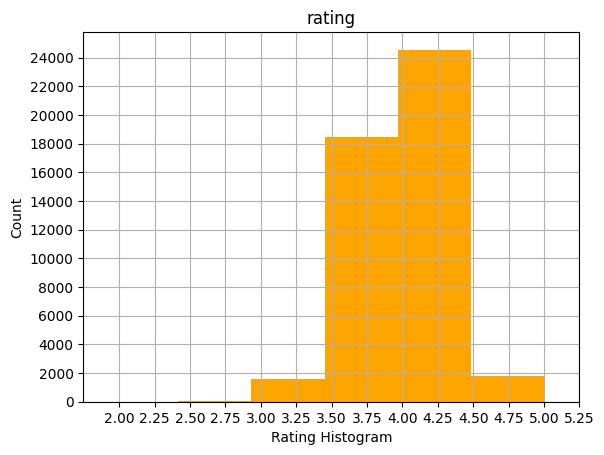

In [ ]:
# Drop NaN values
train_test.dropna(subset=['rating'], inplace=True)

# Make a copy of column
ratings_hist = train_test[['rating']].copy()

# Histogram plot
ratings_hist.hist(color='orange', bins=6)
plt.xlabel('Rating Histogram')
plt.ylabel('Count')
plt.xticks(np.arange(2, 5.5, 0.25))
plt.yticks(np.arange(0, 25000, 2000))
plt.show()

Παρατήρηση: Ο μέσος όρος των βιβλίων κυμαίνονται σε αξιολογήσεις μεταξύ 4 με 4.5

**2.** Ποιά είναι τα 10 βιβλία με τις περισσότερες σελίδες

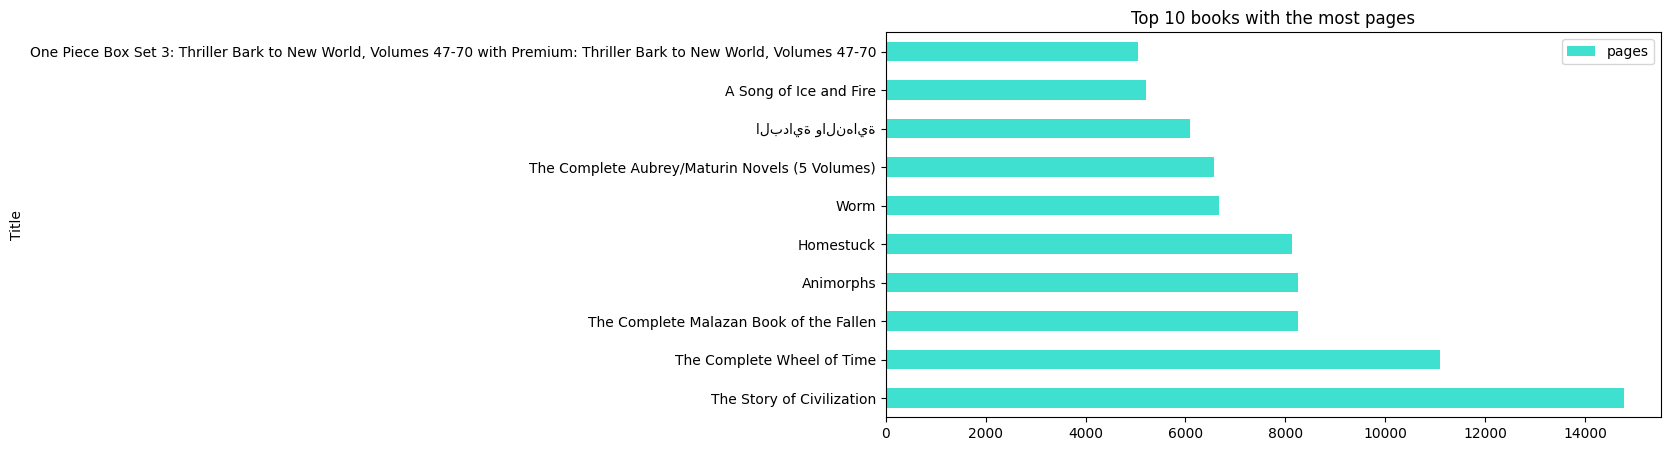

In [ ]:
# Drop NaN values
train_test.dropna(subset=['title', 'pages'], inplace=True)

# Some rows have 'pages' value equal to "1 page"; we will convert these to int
train_test['pages'] = train_test['pages'].replace('1 page', '1', regex=True)
train_test['pages'] = train_test['pages'].astype(int)

# Create a dataframe with 'title' and 'pages'
most_pages = train_test[['title', 'pages']].copy()

# Drop duplicates
most_pages = most_pages.drop_duplicates(subset=['title'])

# Keep top 10 books with the most pages
most_pages = most_pages.nlargest(10, ['pages'])

# Bar plot
most_pages.plot(x ='title', y='pages', kind = 'barh', figsize=(10,5), color='turquoise')
plt.ylabel('Title')
plt.title('Top 10 books with the most pages')
plt.show()

Παρατήρηση: Τα παραπάνω είναι τα 10 βιβλία με τις περισσότερες σελίδες, ενώ το μεγαλύτερο βλέπουμε πως είναι το 'The Story of Civilization'

**3.** Ποιά είναι τα 10 βιβλία με τα περισσότερα 5-αστέρια (χρησιμοποιήστε μόνο τα βιβλία που έχουν λάβει πάνω από 10.000 5-star ratings από τη στήλη ratingStar5)

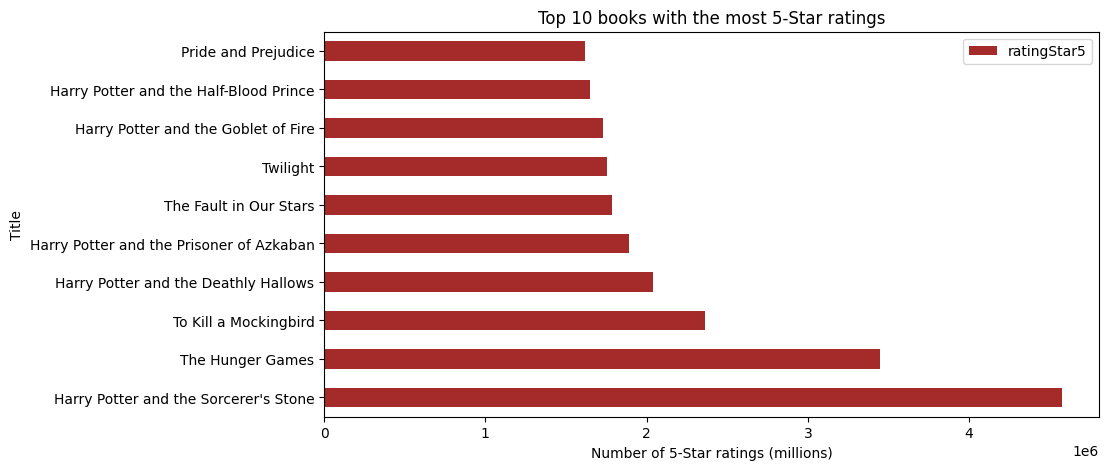

In [ ]:
# Create a dataframe with 'title' and 'ratingStar5'
best_books = train_test[['title', 'ratingStar5']].copy()

# Select books with over 10000 5-Star ratings
best_books = best_books[best_books['ratingStar5'] > 10000]

# Drop duplicates
best_books = best_books.drop_duplicates(subset=['title'])

# Keep top 10 books with the most pages
best_books = best_books.nlargest(10, ['ratingStar5'])

# Bar plot
best_books.plot(x ='title', y='ratingStar5', kind = 'barh', figsize=(10,5), color='brown')
plt.title('Top 10 books with the most 5-Star ratings')
plt.ylabel('Title')
plt.xlabel('Number of 5-Star ratings (millions)')
plt.show()

Παρατήρηση: Τα παραπάνω είναι τα 10 βιβλία με τις περισσότερες αξιολογήσεις 5 αστέρων, ενώ τα περισσότερα έχει συλλέξει ο τίτλος 'Harry Potter and the Sorcerer's Stone'

**6.** Ποιοι είναι οι 10 συγγραφείς με τις περισσότερες κριτικές (χρησιμοποιήστε την στήλη numRatings).

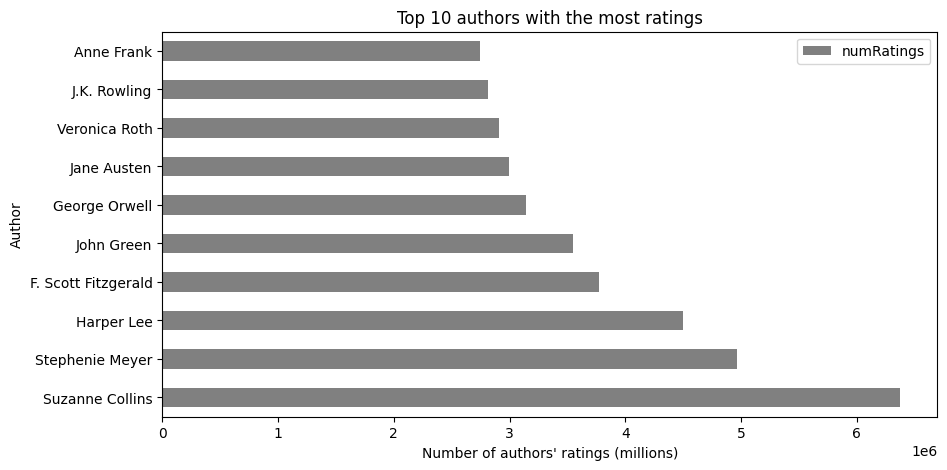

In [ ]:
# Drop NaN values
train_test.dropna(subset=['author', 'numRatings'], inplace=True)

# Create a dataframe with 'author' and 'numRatings'
auth_ratings = train_test[['author', 'numRatings']].copy()

# Drop duplicates
auth_ratings = auth_ratings.drop_duplicates(subset=['author'])

# We want only the main author (delete 'goodreads author' title, translators, assistants, editors  etc)
auth_ratings['author'] = auth_ratings['author'].str.split(',').str[0].str.strip().str.split('(').str[0].str.strip()

# Keep top 10 authors with the most ratings
auth_ratings = auth_ratings.nlargest(10, ['numRatings'])

# Bar plot
auth_ratings.plot(x ='author', y='numRatings', kind = 'barh', figsize=(10,5), color='grey')
plt.title('Top 10 authors with the most ratings')
plt.ylabel('Author')
plt.xlabel('Number of authors\' ratings (millions)')
plt.show()

Παρατήρηση: Οι παραπάνω 10 συγγραφείς έχουν μαζέψει τις περισσότερες κριτικές, με πρώτη την Suzanne Collins

**8.** Ποιές είναι οι πιο συχνές γλώσσες που έχουν γραφτεί τα βιβλία στα δεδομένα σας

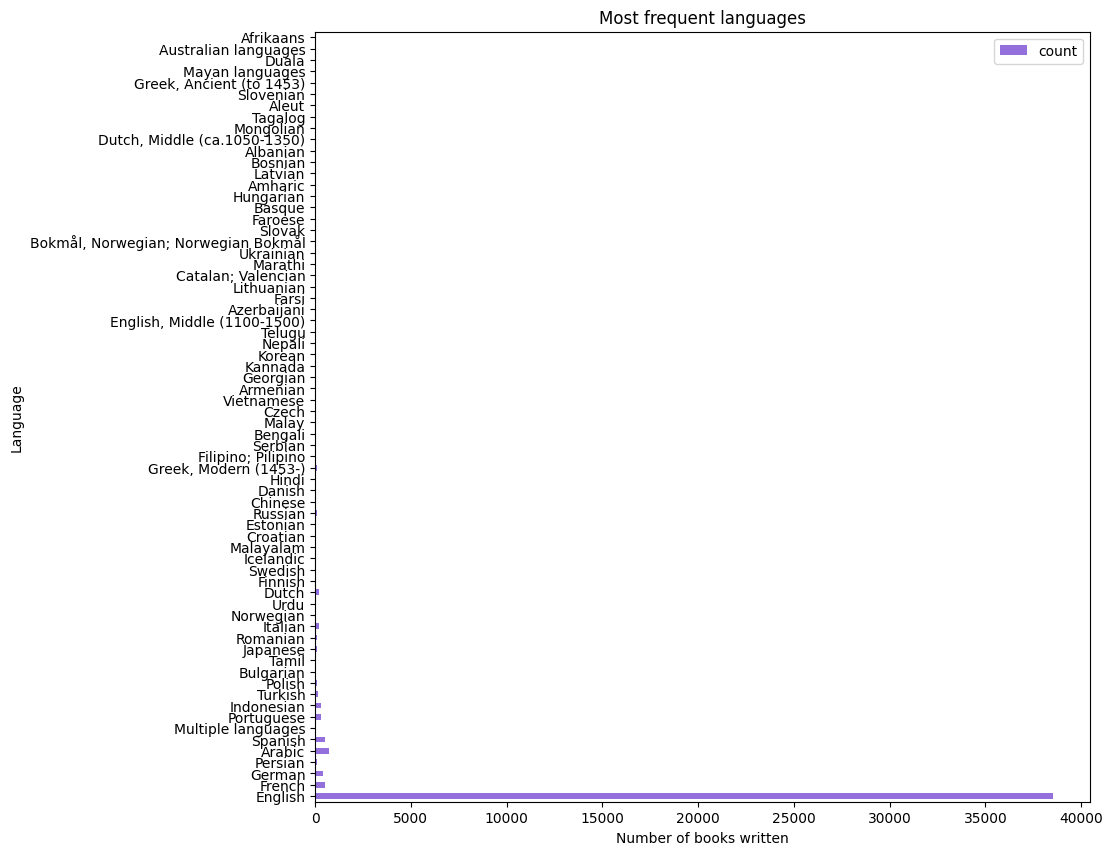

In [ ]:
# Drop NaN values
train_test.dropna(subset=['bookId', 'language'], inplace=True)

# Create a dataframe with 'bookId' and 'language'
freq_lang = train_test[['bookId', 'language']]

# Get unique IDs
freq_lang = freq_lang.drop_duplicates(subset=['bookId'])

# Group by language and count ids
freq_lang['count'] = freq_lang.groupby(['language'])['bookId'].transform('count')

# Drop duplicates
freq_lang = freq_lang.drop_duplicates(subset=['language'] )
freq_lang = freq_lang[['language','count']]

# Bar plot
freq_lang.plot(x ='language', y='count', kind = 'barh', figsize=(10,10), color='mediumpurple')
plt.title('Most frequent languages')
plt.ylabel('Language')
plt.xlabel('Number of books written')
plt.show()

Παρατήρηση: Με διαφορά πιο συχνή η Αγγλική γλώσσα

### **Ζητούμενο 3**: Υλοποίηση Recommendation System

In [ ]:
# Extract the ID and convert it to numeric
train_test['bookId'] = train_test['bookId'].str.extract(r'(\d+)')
train_test['bookId'] = pd.to_numeric(train_test['bookId'], errors='coerce')
train_test = train_test.dropna(subset=['bookId'])

# Extract the necessary columns and rows from the original dataframe
new_train_test = train_test.loc[train_test['language'] == 'English', ['bookId', 'description']].copy()

# Define the batch size
batch_size = 1000

# The number of batches is determined by dividing the length of 'new_train_test' - 1 by batch_size
# plus 1 to account for the remaining data that doesn't fit into a full batch
num_batches = (len(new_train_test) - 1) // batch_size + 1

***TF-IDF matrix and Cosine similarity***
Λόγω του όγκου των δεδομένων η RAM γεμίζει προτού ολοκληρωθεί η διαδικασία για όλες τις εγγραφές οπότε χωρίζουμε τα δεδομένα μας σε παρτίδες. Δημιουργούμε τον πίνακα TF-IDF και υπολογίζουμε την μετρική για τα βιβλία ανά παρτίδα και στο τέλος εξάγουμε το dictionary που περιέχει για κάθε βιβλίο τα 100 πιο όμοια με αυτό βιβλία.

*   Για unigrams

In [ ]:
# Create an empty dictionary to store the similar books
uni_similar_books = {}

# Create the TfidfVectorizer only for unigrams
uni_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')

# Fit the vectorizer to the entire column
uni_vectorizer.fit(new_train_test['description'].values.astype('U'))

# Process the data in batches
for uni_batch_index in range(num_batches):
    # Select the current batch
    uni_start_index = uni_batch_index * batch_size
    uni_end_index = min((uni_batch_index + 1) * batch_size, len(new_train_test))
    uni_batch_data = new_train_test.iloc[uni_start_index:uni_end_index]

    # Transform the current batch using the fitted vectorizer
    uni_tfidf_matrix = uni_vectorizer.transform(uni_batch_data['description'].values.astype('U'))

    # Calculate the similarity matrix for the current batch
    uni_batch_similarity_matrix = cosine_similarity(uni_tfidf_matrix)

    uni_book_ids = uni_batch_data['bookId'].values

    # Traverse through the books in the current batch
    for uni_book_index in range(len(uni_batch_similarity_matrix)):
        # Select the current book
        uni_book_id = uni_book_ids[uni_book_index]

        # Store the similarity of the book with others
        uni_similarities = list(enumerate(uni_batch_similarity_matrix[uni_book_index]))

        # Sort by similarity score (skip the first item which is self-similarity)
        uni_top_similarities = sorted(uni_similarities, key=lambda x: x[1], reverse=True)[1:101]

        # Store the similar books in a dictionary for each book
        if uni_book_id not in uni_similar_books:
            uni_similar_books[uni_book_id] = {}

        # Iterate the similar books of the current batch
        for uni_similar_book_index, uni_similarity_score in uni_top_similarities:
            # Retrieve the book ID of the similar book
            uni_similar_book_id = uni_book_ids[uni_similar_book_index]
            # Store the similarity score of the similar book with the current book
            uni_similar_books[uni_book_id][uni_similar_book_id] = uni_similarity_score

    # Clear the memory for the current batch
    del uni_tfidf_matrix
    del uni_batch_similarity_matrix

Εκτυπώσεις για παρατήρηση αποτελεσμάτων:

In [ ]:
# For the first 3 books of the unigram dictionary
# print the 5 most similar books
count_books = 0
for uni_book_id, uni_similar in uni_similar_books.items():
    count_similar = 0
    print(f"Book ID: {uni_book_id}")
    print("Most similar books:")
    for uni_similar_book_id, uni_similarity_score in uni_similar.items():
        print(f"- Book ID: {uni_similar_book_id} (Similarity: {uni_similarity_score})")
        count_similar += 1
        if count_similar >= 5:
            break
    count_books += 1
    if count_books >= 3:
        break

Book ID: 2767052
Most similar books:
- Book ID: 7260188 (Similarity: 0.4225939945451928)
- Book ID: 6148028 (Similarity: 0.3696931070279766)
- Book ID: 7938275 (Similarity: 0.1753090509034511)
- Book ID: 60748 (Similarity: 0.0974309790906377)
- Book ID: 9275658 (Similarity: 0.0907733034557588)
Book ID: 2
Most similar books:
- Book ID: 15881 (Similarity: 0.3424617227199878)
- Book ID: 5 (Similarity: 0.31451241315678735)
- Book ID: 3 (Similarity: 0.279604448475422)
- Book ID: 6 (Similarity: 0.22157122708064625)
- Book ID: 1 (Similarity: 0.188905784653675)
Book ID: 2657
Most similar books:
- Book ID: 37781 (Similarity: 0.13035103954445532)
- Book ID: 23878688 (Similarity: 0.09948810659415179)
- Book ID: 18114322 (Similarity: 0.09059816575765968)
- Book ID: 32049 (Similarity: 0.08823629713089731)
- Book ID: 52892857 (Similarity: 0.08799788545913784)


*   Για bigrams

In [ ]:
# Create an empty dictionary to store the similar books
bi_similar_books = {}

# Create the TfidfVectorizer only for bigrams
bi_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')

# Fit the vectorizer to the entire column
bi_vectorizer.fit(new_train_test['description'].values.astype('U'))

# Process the data in batches
for bi_batch_index in range(num_batches):
    # Select the current batch
    bi_start_index = bi_batch_index * batch_size
    bi_end_index = min((bi_batch_index + 1) * batch_size, len(new_train_test))
    bi_batch_data = new_train_test.iloc[bi_start_index:bi_end_index]

    # Transform the current batch using the fitted vectorizer
    bi_tfidf_matrix = bi_vectorizer.transform(bi_batch_data['description'].values.astype('U'))

    # Calculate the similarity matrix for the current batch
    bi_batch_similarity_matrix = cosine_similarity(bi_tfidf_matrix)

    bi_book_ids = bi_batch_data['bookId'].values

    # Traverse through the books in the current batch
    for bi_book_index in range(len(bi_batch_similarity_matrix)):
        # Select the current book
        bi_book_id = bi_book_ids[bi_book_index]

        # Store the similarity of the book with others
        bi_similarities = list(enumerate(bi_batch_similarity_matrix[bi_book_index]))

        # Sort by similarity score (skip the first item which is self-similarity)
        bi_top_similarities = sorted(bi_similarities, key=lambda x: x[1], reverse=True)[1:101]

        # Store the similar books in a dictionary for each book
        if bi_book_id not in bi_similar_books:
            bi_similar_books[bi_book_id] = {}

        # Iterate the similar books of the current batch
        for bi_similar_book_index, bi_similarity_score in bi_top_similarities:
            # Retrieve the book ID of the similar book
            bi_similar_book_id = bi_book_ids[bi_similar_book_index]
            # Store the similarity score of the similar book with the current book
            bi_similar_books[bi_book_id][bi_similar_book_id] = bi_similarity_score

    # Clear the memory for the current batch
    del bi_tfidf_matrix
    del bi_batch_similarity_matrix

Εκτυπώσεις για παρατήρηση αποτελεσμάτων:

In [ ]:
# For the first 3 books of the bigram dictionary
# print the 5 most similar books
count_books = 0
for bi_book_id, bi_similar in bi_similar_books.items():
    count_similar = 0
    print(f"Book ID: {bi_book_id}")
    print("Most similar books:")
    for bi_similar_book_id, bi_similarity_score in bi_similar.items():
        print(f"- Book ID: {bi_similar_book_id} (Similarity: {bi_similarity_score})")
        count_similar += 1
        if count_similar >= 5:
            break
    count_books += 1
    if count_books >= 3:
        break

Book ID: 2767052
Most similar books:
- Book ID: 7260188 (Similarity: 0.4225939945451928)
- Book ID: 6148028 (Similarity: 0.3696931070279766)
- Book ID: 7938275 (Similarity: 0.1753090509034511)
- Book ID: 60748 (Similarity: 0.0974309790906377)
- Book ID: 9275658 (Similarity: 0.0907733034557588)
Book ID: 2
Most similar books:
- Book ID: 15881 (Similarity: 0.3424617227199878)
- Book ID: 5 (Similarity: 0.31451241315678735)
- Book ID: 3 (Similarity: 0.279604448475422)
- Book ID: 6 (Similarity: 0.22157122708064625)
- Book ID: 1 (Similarity: 0.188905784653675)
Book ID: 2657
Most similar books:
- Book ID: 37781 (Similarity: 0.13035103954445532)
- Book ID: 23878688 (Similarity: 0.09948810659415179)
- Book ID: 18114322 (Similarity: 0.09059816575765968)
- Book ID: 32049 (Similarity: 0.08823629713089731)
- Book ID: 52892857 (Similarity: 0.08799788545913784)


***Recommendation Functions***
Αλλάζουμε τον ορισμό της συνάρτησης recommend σε uni_recommend για τα unigrams και bi_recommend για τα bigrams αντίστοιχα.

*   Για unigrams

In [ ]:
def uni_recommend(item_id, num):
    if item_id not in uni_similar_books:
        print(f"Book ID: {item_id} not found.")
        return

    # Retrieve the title of the item being recommended
    book_title = train_test[train_test['bookId'] == item_id]['title'].values[0]

    print(f"Recommending {num} books similar to: {book_title}")
    print("---------------------------------------------------------")

    count = 0
    # Iterate over the similar books and their similarity scores
    for similar_book_id, similarity_score in uni_similar_books[item_id].items():
        # Retrieve the title and description of the similar book
        book_title = train_test[train_test['bookId'] == similar_book_id]['title'].values[0]
        book_description = train_test[train_test['bookId'] == similar_book_id]['description'].values[0]

        print(f"Recommended: {book_title}")
        # Print the wrapped description (for visibility reasons)
        print("Description:")
        wrapped_description = textwrap.fill(book_description, width=150)
        print(wrapped_description)

        print(f"(score: {similarity_score})\n")

        count += 1
        if count >= num:
            break

*   Για bigrams

In [ ]:
def bi_recommend(item_id, num):
    if item_id not in bi_similar_books:
        print(f"Book ID: {item_id} not found.")
        return

    # Retrieve the title of the item being recommended
    book_title = train_test[train_test['bookId'] == item_id]['title'].values[0]
    print(f"Recommending {num} books similar to: {book_title}")
    print("---------------------------------------------------------")

    count = 0
    # Iterate over the similar books and their similarity scores
    for similar_book_id, similarity_score in bi_similar_books[item_id].items():
        # Retrieve the title and description of the similar book
        book_title = train_test[train_test['bookId'] == similar_book_id]['title'].values[0]
        book_description = train_test[train_test['bookId'] == similar_book_id]['description'].values[0]

        print(f"Recommended: {book_title}")

        # Print the wrapped description (for visibility reasons)
        print("Description:")
        wrapped_description = textwrap.fill(book_description, width=150)
        print(wrapped_description)

        print(f"(score: {similarity_score})\n")

        count += 1
        if count >= num:
            break

Δοκιμές ελέγχου των συναρτήσεων:

In [ ]:
uni_recommend(2767052, 5)

Recommending 5 books similar to: The Hunger Games
---------------------------------------------------------
Recommended: Mockingjay
Description:
The final book in the ground-breaking HUNGER GAMES trilogy, this new foiled edition of MOCKINGJAY is available for a limited period of time. Against
all odds, Katniss Everdeen has survived the Hunger Games twice. But now that she's made it out of the bloody arena alive, she's still not safe. The
Capitol is angry. The Capitol wants revenge. Who do they think should pay for the unrest? Katniss. And what's worse, President Snow has made it clear
that no one else is safe either. Not Katniss's family, not her friends, not the people of District 12.
(score: 0.4225939945451928)

Recommended: Catching Fire
Description:
SPARKS ARE IGNITING.FLAMES ARE SPREADING.AND THE CAPITAL WANTS REVENGE.Against all odds, Katniss Everdeen has survived the Hunger Games. She and
fellow District 12 tribute Peeta Mellark are miraculously still alive. Katniss should be re

In [ ]:
bi_recommend(2767052, 5)

Recommending 5 books similar to: The Hunger Games
---------------------------------------------------------
Recommended: Mockingjay
Description:
The final book in the ground-breaking HUNGER GAMES trilogy, this new foiled edition of MOCKINGJAY is available for a limited period of time. Against
all odds, Katniss Everdeen has survived the Hunger Games twice. But now that she's made it out of the bloody arena alive, she's still not safe. The
Capitol is angry. The Capitol wants revenge. Who do they think should pay for the unrest? Katniss. And what's worse, President Snow has made it clear
that no one else is safe either. Not Katniss's family, not her friends, not the people of District 12.
(score: 0.4225939945451928)

Recommended: Catching Fire
Description:
SPARKS ARE IGNITING.FLAMES ARE SPREADING.AND THE CAPITAL WANTS REVENGE.Against all odds, Katniss Everdeen has survived the Hunger Games. She and
fellow District 12 tribute Peeta Mellark are miraculously still alive. Katniss should be re

In [ ]:
uni_recommend(2, 3)

Recommending 3 books similar to: Harry Potter and the Order of the Phoenix
---------------------------------------------------------
Recommended: Harry Potter and the Chamber of Secrets
Description:
Ever since Harry Potter had come home for the summer, the Dursleys had been so mean and hideous that all Harry wanted was to get back to the Hogwarts
School for Witchcraft and Wizardry. But just as he’s packing his bags, Harry receives a warning from a strange impish creature who says that if Harry
returns to Hogwarts, disaster will strike.And strike it does. For in Harry’s second year at Hogwarts, fresh torments and horrors arise, including an
outrageously stuck-up new professor and a spirit who haunts the girls’ bathroom. But then the real trouble begins – someone is turning Hogwarts
students to stone. Could it be Draco Malfoy, a more poisonous rival than ever? Could it possible be Hagrid, whose mysterious past is finally told? Or
could it be the one everyone at Hogwarts most suspects… Ha

In [ ]:
bi_recommend(2, 3)

Recommending 3 books similar to: Harry Potter and the Order of the Phoenix
---------------------------------------------------------
Recommended: Harry Potter and the Chamber of Secrets
Description:
Ever since Harry Potter had come home for the summer, the Dursleys had been so mean and hideous that all Harry wanted was to get back to the Hogwarts
School for Witchcraft and Wizardry. But just as he’s packing his bags, Harry receives a warning from a strange impish creature who says that if Harry
returns to Hogwarts, disaster will strike.And strike it does. For in Harry’s second year at Hogwarts, fresh torments and horrors arise, including an
outrageously stuck-up new professor and a spirit who haunts the girls’ bathroom. But then the real trouble begins – someone is turning Hogwarts
students to stone. Could it be Draco Malfoy, a more poisonous rival than ever? Could it possible be Hagrid, whose mysterious past is finally told? Or
could it be the one everyone at Hogwarts most suspects… Ha

### **Ζητούμενο 4**: Υλοποίηση Κατηγοριοποίησης (Classification)

#### Προεπεξεργασία δεδομένων

Προεκκαθάριση της στήλης description

In [ ]:
# Necessary libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Necessary resources
nltk.download('stopwords')
nltk.download('wordnet')

# Find the 10 most frequent genres
top_genres = train_test['genreSingle'].value_counts().head(10).index.tolist()

# Dataframe containing books of the most frequent genres
top_genres_train_test = train_test[train_test['genreSingle'].isin(top_genres)]

# Extract the necessary columns from the dataframe
top_genres_train_test = top_genres_train_test[['bookId', 'description', 'genreSingle']].copy()

# Drop NaN values
top_genres_train_test = top_genres_train_test.dropna(subset=['bookId', 'description', 'genreSingle'])

# Remove punctuation marks
top_genres_train_test['description'] = top_genres_train_test['description'].str.replace(r'[^\w\s]', '', regex=True)

# Convert all words to lowercase
top_genres_train_test['description'] = top_genres_train_test['description'].str.lower()

# Remove stop words
stop_words = set(stopwords.words('english'))
top_genres_train_test['description'] = top_genres_train_test['description'].apply(
    lambda description: ' '.join([word for word in description.split() if word not in stop_words])
)

# Lemmatization
lemmatizer = WordNetLemmatizer()
top_genres_train_test['description'] = top_genres_train_test['description'].apply(
    lambda description: ' '.join([lemmatizer.lemmatize(word) for word in description.split()])
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Εφαρμόζουμε την μέθοδο word2vec για τα descriptions και με την χρήση των embeddings υπολογίζουμε για κάθε description ένα διάνυσμα με 300 τιμές (features)

In [ ]:
from gensim.models import Word2Vec

# Tokenize the descriptions
tokenized_descriptions = [description.split() for description in top_genres_train_test['description']]

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_descriptions, vector_size=300, window=5, min_count=1, workers=4)

# Calculate the average vector for each description
description_vectors = []
for description in tokenized_descriptions:
    vectors = [model.wv.get_vector(word) for word in description if word in model.wv.key_to_index]
    if vectors:
        # Use np.mean() for averaging
        average_vector = np.mean(vectors, axis=0)
    else:
        average_vector = np.zeros(300)  # If no word vectors are found, return a zero vector
    description_vectors.append(average_vector)

# Assert that the lengths of the vectors and the original dataframe are the same
assert len(description_vectors) == len(top_genres_train_test), "Mismatch between vector count and original dataframe"

# Convert the list of description vectors into an array
description_vectors = np.array(description_vectors)

# Create column names for the description vectors
vector_columns = [f'vector_{i+1}' for i in range(description_vectors.shape[1])]

# Create a dataframe with the description vectors
description_df = pd.DataFrame(description_vectors, columns=vector_columns)

# Concatenate the new dataframe with the original one
top_genres_train_test = pd.concat([top_genres_train_test, description_df], axis=1)

# Save the dataframe with the vectors to a pickle file
top_genres_train_test.to_pickle('/content/gdrive/MyDrive/DataMining/Project2/genres_vectors.pkl')

# Save the Word2Vec model
model.save('/content/gdrive/MyDrive/DataMining/Project2/word2vec_model.pkl')

Φορτώνουμε τα αρχεία .pkl

In [ ]:
# Load the dataframe with the feature vectors
loaded_dataframe = pd.read_pickle('/content/gdrive/MyDrive/DataMining/Project2/genres_vectors.pkl')

# Load the Word2Vec model
loaded_model = Word2Vec.load('/content/gdrive/MyDrive/DataMining/Project2/word2vec_model.pkl')

Κωδικοποιούμε τα δεδομένα και χωρίζουμε το σύνολο σε train (80%) και test (20%)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop rows with NaN values
loaded_dataframe.dropna(inplace=True)

# Encode the 'genreSingle' column using label encoding, as it is a categorical variable
label_encoder = LabelEncoder()
loaded_dataframe['genreEncoded'] = label_encoder.fit_transform(loaded_dataframe['genreSingle'])

# Drop the 'description' column since we have transformed it into Word2Vec vectors
loaded_dataframe.drop('description', axis=1, inplace=True)

# Use the remaining vector columns as input features for training the classification models
input_features = vector_columns
X = loaded_dataframe[input_features] # contains the input features
y = loaded_dataframe['genreEncoded'] # the target variable (encoded genre labels)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Naive-Bayes

In [ ]:
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Filter out the UndefinedMetricWarning and UserWarnings
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Ensure that all features in the X_train dataset are on a similar scale (no negatives)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the NB object
NB = naive_bayes.MultinomialNB()

# Fitting the training data
NB.fit(X_train_scaled, y_train)

# Print the scores for 10-fold cross validation on the training dataset
print('10-fold cross validation scores:')

cv = np.mean(cross_val_score(NB, X_train_scaled, y_train, cv=10, scoring = 'precision_weighted'))
print ('Average accuracy using Naive Bayes with 10-fold cross validation and precision : {}'.format(cv))

cv = np.mean(cross_val_score(NB, X_train_scaled, y_train, cv=10, scoring = 'recall_weighted'))
print ('Average accuracy using Naive Bayes with 10-fold cross validation and recall : {}'.format(cv))

cv = np.mean(cross_val_score(NB, X_train_scaled, y_train, cv=10, scoring = 'f1_weighted'))
print ('Average accuracy using Naive Bayes with 10-fold cross validation and f1 measure: {}'.format(cv))

cv = np.mean(cross_val_score(NB, X_train_scaled, y_train, cv=10))
print ('Average accuracy using Naive Bayes with 10-fold cross validation : {}\n'.format(cv))

# Predict the labels on the test set
predictions_NB = NB.predict(X_test)

# Print the scores for the predictions on the test set
print('Printing scores for predictions on the test set:')

prec_score_test = precision_score(y_test, predictions_NB, average = 'weighted')
print ('Average accuracy using Naive Bayes and precision : {}'.format(prec_score_test))

rec_score_test = recall_score(y_test, predictions_NB, average = 'weighted')
print ('Average accuracy using Naive Bayes and recall : {}'.format(rec_score_test))

f1_score_test = f1_score(y_test, predictions_NB, average = 'weighted')
print ('Average accuracy using Naive Bayes and f1 measure: {}'.format(f1_score_test))

acc_score_test = accuracy_score(y_test, predictions_NB)
print ('Average accuracy using Naive Bayes: {}'.format(acc_score_test))

10-fold cross validation scores:
Average accuracy using Naive Bayes with 10-fold cross validation and precision : 0.0927143227589544
Average accuracy using Naive Bayes with 10-fold cross validation and recall : 0.2339070567986231
Average accuracy using Naive Bayes with 10-fold cross validation and f1 measure: 0.09470139338565012
Average accuracy using Naive Bayes with 10-fold cross validation : 0.2339070567986231

Printing scores for predictions on the test set:
Average accuracy using Naive Bayes and precision : 0.10372361140699804
Average accuracy using Naive Bayes and recall : 0.19717825189263594
Average accuracy using Naive Bayes and f1 measure: 0.09226467915938606
Average accuracy using Naive Bayes: 0.19717825189263594


#### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RF object
RF = RandomForestClassifier(n_estimators=100)

# Fitting the training data
RF.fit(X_train, y_train)

# Print the scores for 10-fold cross validation on the training dataset
print('10-fold cross validation scores:')

cv = np.mean(cross_val_score(RF, X_train, y_train, cv=10, scoring = 'precision_weighted'))
print ('Average accuracy using Random Forests with 10-fold cross validation and precision : {}'.format(cv))

cv = np.mean(cross_val_score(RF, X_train, y_train, cv=10, scoring = 'recall_weighted'))
print ('Average accuracy using Random Forests with 10-fold cross validation and recall : {}'.format(cv))

cv = np.mean(cross_val_score(RF, X_train, y_train, cv=10, scoring = 'f1_weighted'))
print ('Average accuracy using Random Forests with 10-fold cross validation and f1 measure: {}'.format(cv))

cv = np.mean(cross_val_score(RF, X_train, y_train, cv=10, scoring = 'accuracy'))
print ('Average accuracy using Random Forests with 10-fold cross validation : {}'.format(cv))

# Predict the labels on the test set
predictions_RF = RF.predict(X_test)

# Print the scores for the predictions on the test set
print('Printing scores for predictions on the test set:')

prec_score_test = precision_score(y_test, predictions_RF, average = 'weighted')
print ('Average accuracy using Random Forests and precision : {}'.format(prec_score_test))

rec_score_test = recall_score(y_test, predictions_RF, average = 'weighted')
print ('Average accuracy using Random Forests and recall : {}'.format(rec_score_test))

f1_score_test = f1_score(y_test, predictions_RF, average = 'weighted')
print ('Average accuracy using Random Forests and f1 measure: {}'.format(f1_score_test))

acc_score_test = accuracy_score(y_test, predictions_RF)
print ('Average accuracy using Random Forests: {}'.format(acc_score_test))

10-fold cross validation scores:
Average accuracy using Random Forests with 10-fold cross validation and precision : 0.15358385577656836
Average accuracy using Random Forests with 10-fold cross validation and recall : 0.21781411359724615
Average accuracy using Random Forests with 10-fold cross validation and f1 measure: 0.14740467019053688
Average accuracy using Random Forests with 10-fold cross validation : 0.21643717728055076
Printing scores for predictions on the test set:
Average accuracy using Random Forests and precision : 0.12167105155159558
Average accuracy using Random Forests and recall : 0.2050929112181693
Average accuracy using Random Forests and f1 measure: 0.1327651600741948
Average accuracy using Random Forests: 0.2050929112181693


#### Suport Vector Machines

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {'kernel': ['rbf'], 'C': [10], 'gamma': ['auto']}

# Initializing the SVM object
svc = svm.SVC()
SVM = GridSearchCV(svc, param_grid)

# Fitting the training data
SVM.fit(X_train, y_train)

# Print the scores for 10-fold cross validation on the training dataset
print('10-fold cross validation scores:')

cv = np.mean(cross_val_score(SVM, X_train, y_train, cv=10, scoring = 'precision_weighted'))
print ('Average accuracy using SVM with 10-fold cross validation and precision : {}'.format(cv))

cv = np.mean(cross_val_score(SVM, X_train, y_train, cv=10, scoring = 'recall_weighted'))
print ('Average accuracy using SVM with 10-fold cross validation and recall : {}'.format(cv))

cv = np.mean(cross_val_score(SVM, X_train, y_train, cv=10, scoring = 'f1_weighted'))
print ('Average accuracy using SVM with 10-fold cross validation and f1 measure: {}'.format(cv))

cv = np.mean(cross_val_score(SVM, X_train, y_train, cv=10, scoring = 'accuracy'))
print ('Average accuracy using SVM with 10-fold cross validation : {}'.format(cv))

# Predict the labels on the test set
predictions_SVM = SVM.predict(X_test)

# Print the scores for the predictions on the test set
print('Printing scores for predictions on the test set:')

prec_score_test = precision_score(y_test, predictions_SVM, average = 'weighted')
print ('Average accuracy using SVM and precision : {}'.format(prec_score_test))

rec_score_test = recall_score(y_test, predictions_SVM, average = 'weighted')
print ('Average accuracy using SVM and recall : {}'.format(rec_score_test))

f1_score_test = f1_score(y_test, predictions_SVM, average = 'weighted')
print ('Average accuracy using SVM and f1 measure: {}'.format(f1_score_test))

acc_score_test = accuracy_score(y_test, predictions_SVM)
print ('Average accuracy using SVM: {}'.format(acc_score_test))

10-fold cross validation scores:
Average accuracy using SVM with 10-fold cross validation and precision : 0.12136836061193264
Average accuracy using SVM with 10-fold cross validation and recall : 0.23605851979345954
Average accuracy using SVM with 10-fold cross validation and f1 measure: 0.09452649998730694
Average accuracy using SVM with 10-fold cross validation : 0.23605851979345954
Printing scores for predictions on the test set:
Average accuracy using SVM and precision : 0.08242306301019546
Average accuracy using SVM and recall : 0.23193392980041294
Average accuracy using SVM and f1 measure: 0.0909931635036106
Average accuracy using SVM: 0.23193392980041294
